# TP2  Apprentissage non-supervisé
<ul>
    <li><b>BENCHEIKH Abdelkarim</b></li>
    <li><b>LOUAIFI Azouaou</b></li>
    <li><b>SAHNOUNE Yacine</b></li>
</ul>

# Bibliothèques

<p>Chargement des bibliothèques et fonctions nécessaires pour le TPs</p>

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## I./ Réduction de dimensions et Visualisation des données

## 2. Dataset Villes

In [6]:
data = pd.read_csv('villes.csv', sep=';') 
X = data.iloc[:, 1:13]
labels = data.iloc[:, 0] 
data.head()

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
3,besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
4,biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2


## PCA du dataset Villes

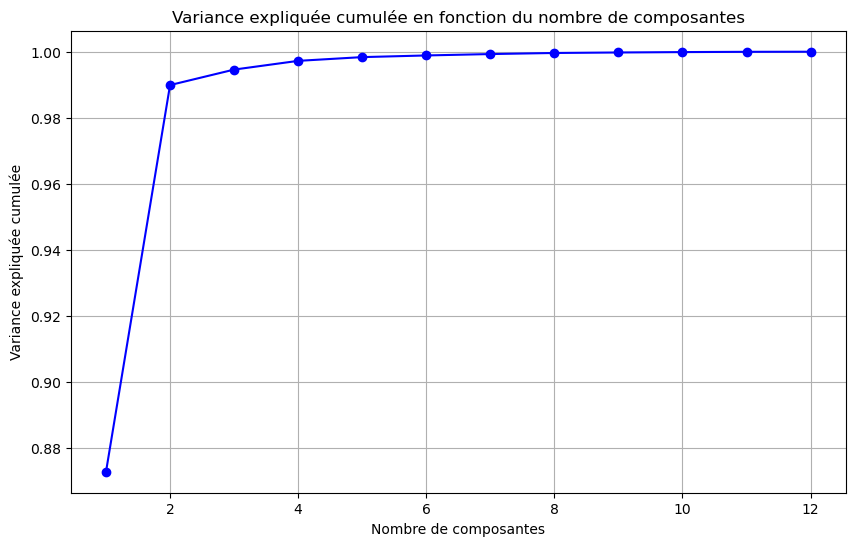

PC1: 0.873 (87.268% cumulé)
PC2: 0.117 (98.989% cumulé)
PC3: 0.005 (99.458% cumulé)
PC4: 0.003 (99.723% cumulé)
PC5: 0.001 (99.837% cumulé)
PC6: 0.001 (99.887% cumulé)
PC7: 0.000 (99.929% cumulé)
PC8: 0.000 (99.962% cumulé)
PC9: 0.000 (99.977% cumulé)
PC10: 0.000 (99.989% cumulé)
PC11: 0.000 (99.997% cumulé)
PC12: 0.000 (100.000% cumulé)


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée cumulée en fonction du nombre de composantes')
plt.grid(True)
plt.show()

for i, var in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {var:.3f} ({cumulative_variance_ratio[i]:.3%} cumulé)")

<h4>2.1 Le nombre d’axes à retenir pour conserver une bonne quantité de l’information est <b>2</b></h4>
<p>Un troisième axe rajoute 0.005 de quantité d'information ce qui est négligeable par rapport au 0.9898 déjà obtenus avec l'axe 1 et l'axe 2</p>

In [10]:
X.columns

Index(['janv', 'fev', 'mars', 'avril', 'mai', 'juin', 'juil', 'aout', 'sept',
       'oct', 'nov', 'dec'],
      dtype='object')

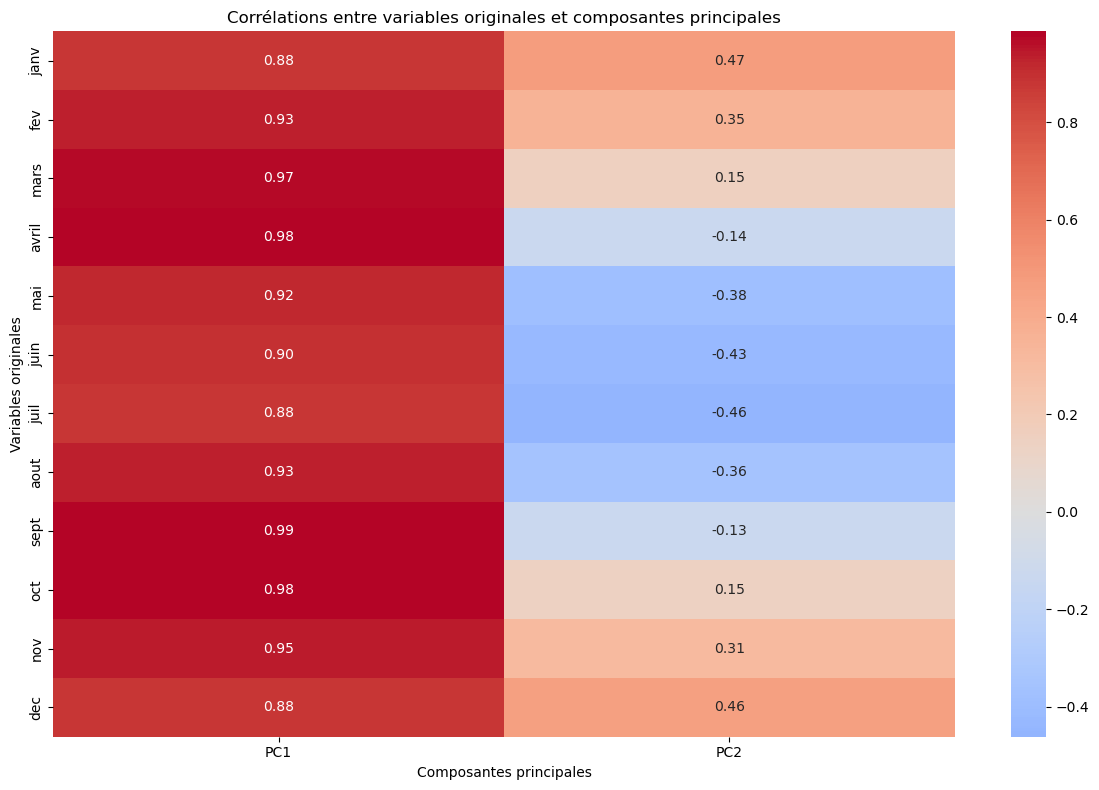

In [11]:
df_original = pd.DataFrame(X, columns=X.columns)
df_pca = pd.DataFrame(X_pca[:, :2], columns=[f'PC{i+1}' for i in range(2)])
correlation_matrix = np.zeros((len(X.columns), 2))  
for i in range(len(X.columns)):
    for j in range(2):
        correlation_matrix[i, j] = np.corrcoef(df_original.iloc[:, i], df_pca.iloc[:, j])[0, 1]

correlation_df = pd.DataFrame(correlation_matrix,
                            index=X.columns,
                            columns=[f'PC{i+1}' for i in range(2)])

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_df, 
            annot=True,  
            cmap='coolwarm',  
            center=0, 
            fmt='.2f') 

plt.title('Corrélations entre variables originales et composantes principales')
plt.xlabel('Composantes principales')
plt.ylabel('Variables originales')
plt.tight_layout()
plt.show()

<h3>2.2 Interprétation des axes</h3>
<p><b>PC1</b> Les très fortes corrélations positives (0.88-0.99) avec tous les mois indiquent que cette composante représente la "température moyenne annuelle" des villes</p>
<p><b>PC2</b> Les villes avec un score élevé sur PC2 ont une forte amplitude thermique (grands écarts de température entre l'hiver et l'été). Tandis que les villes avec un score faible sur PC2 ont une faible amplitude thermique (température plus stable toute l'année)</p>
- Le <b>premier axe</b> représente la température moyenne annuelle des villes <br>
- Le <b>deuxième axe</b> représente la variation saisonnière des températures (été-hiver).

<h3>Visualisation graphique des villes projetées dans le plan principal.</h3>

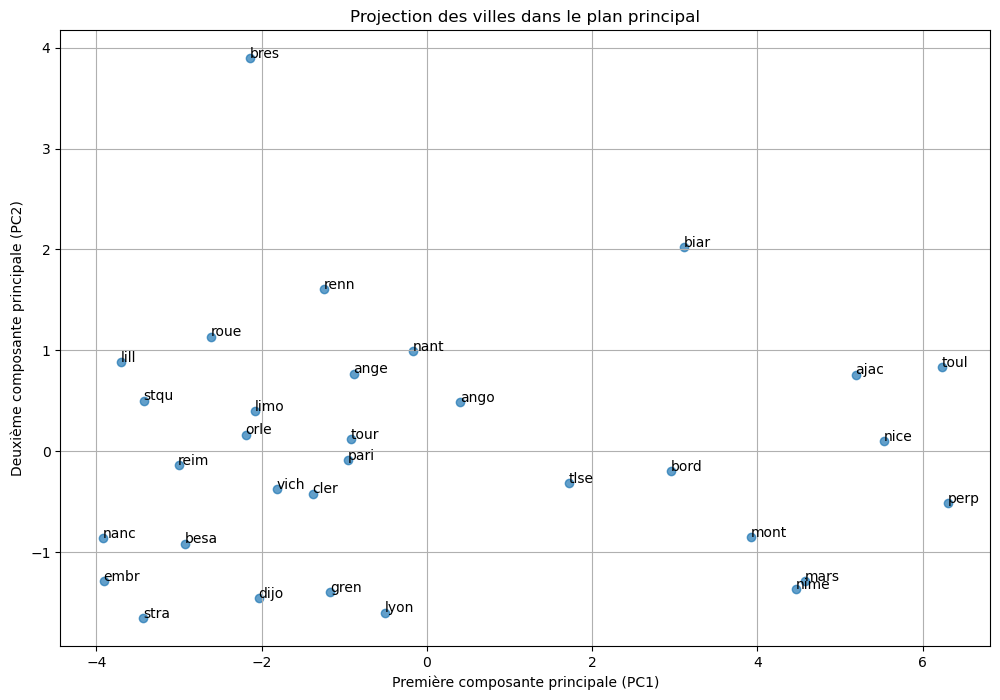

In [14]:
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.xlabel('Première composante principale (PC1)')
plt.ylabel('Deuxième composante principale (PC2)')
plt.title('Projection des villes dans le plan principal')
plt.grid(True)
plt.show()

## 3. Dataset Crimes

In [16]:
data = pd.read_csv('crimes.csv', sep=';') 
X = data.iloc[:, 1:13]
labels = data.iloc[:, 0]

<h3>3.1 PCA du dataset Crimes</h3>

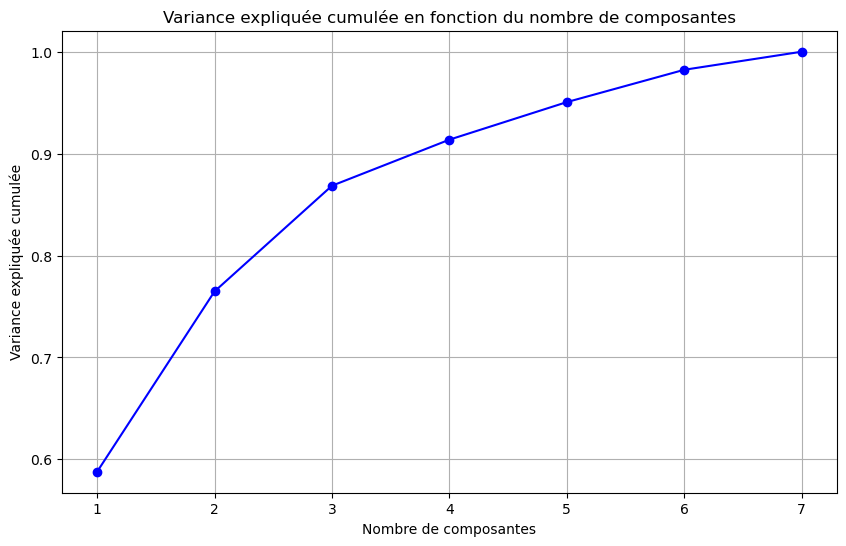

PC1: 0.588 (58.785% cumulé)
PC2: 0.177 (76.481% cumulé)
PC3: 0.104 (86.850% cumulé)
PC4: 0.045 (91.370% cumulé)
PC5: 0.037 (95.056% cumulé)
PC6: 0.032 (98.228% cumulé)
PC7: 0.018 (100.000% cumulé)


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée cumulée en fonction du nombre de composantes')
plt.grid(True)
plt.show()

for i, var in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {var:.3f} ({cumulative_variance_ratio[i]:.3%} cumulé)")

<h3>Le nombre d’axes à retenir pour conserver une bonne quantité de l’information est <b>5</b></h3>

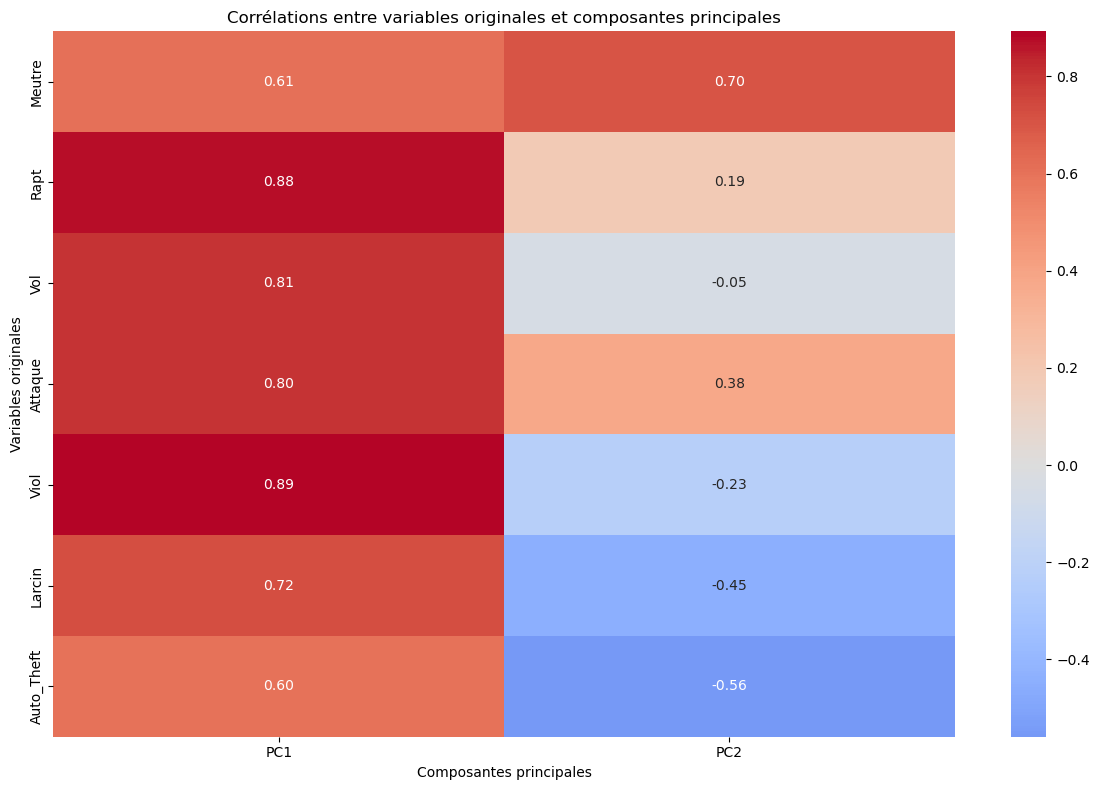

In [20]:
df_original = pd.DataFrame(X, columns=X.columns)
df_pca = pd.DataFrame(X_pca[:, :2], columns=[f'PC{i+1}' for i in range(2)])
correlation_matrix = np.zeros((7, 2))  
for i in range(7):
    for j in range(2):
        correlation_matrix[i, j] = np.corrcoef(df_original.iloc[:, i], df_pca.iloc[:, j])[0, 1]

correlation_df = pd.DataFrame(correlation_matrix,
                            index=X.columns,
                            columns=[f'PC{i+1}' for i in range(2)])

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_df, 
            annot=True,  
            cmap='coolwarm',  
            center=0, 
            fmt='.2f') 

plt.title('Corrélations entre variables originales et composantes principales')
plt.xlabel('Composantes principales')
plt.ylabel('Variables originales')
plt.tight_layout()
plt.show()

<h3>2.2 Interprétation des axes</h3>
<p><b>PC1</b> Cette composante semble représenter le "niveau général de criminalité" car elle est positivement corrélée avec tous les types de crimes</p>

- Le <b>premier axe</b> représente la moyenne des crimes des villes <br>
- Le <b>deuxième axe</b> représente la nature des crimes et leur gravité <b>crimes violents (Meutre, Attaque, Rapt)</b> vs <b>crimes contre les biens (Larcin, Auto-theft, Vol)</b>.

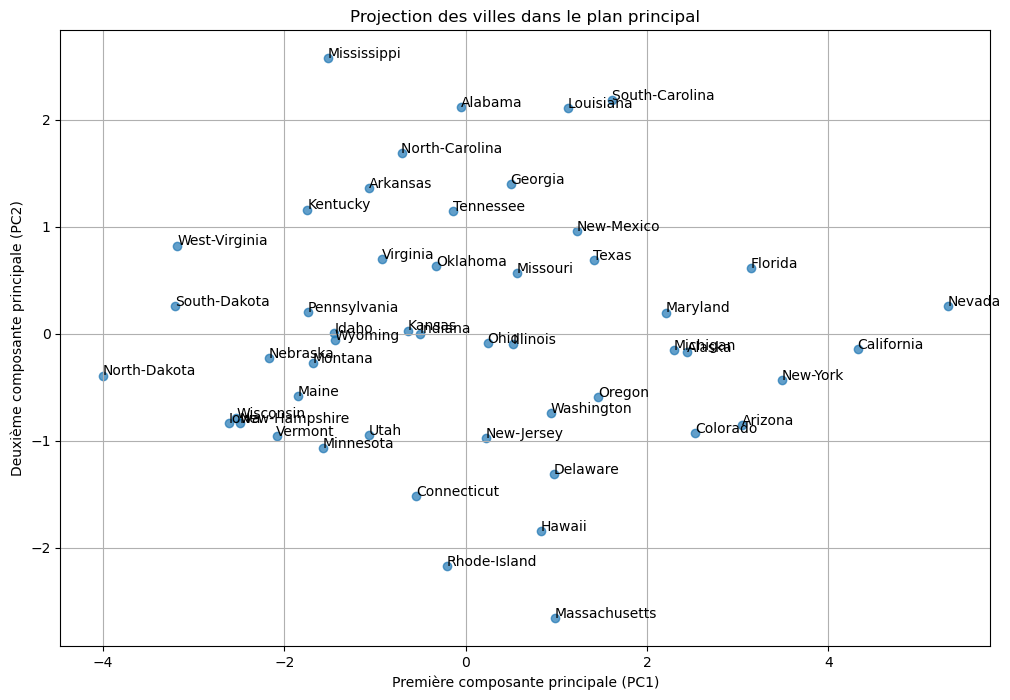

In [22]:
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.xlabel('Première composante principale (PC1)')
plt.ylabel('Deuxième composante principale (PC2)')
plt.title('Projection des villes dans le plan principal')
plt.grid(True)
plt.show()

## Dataset mammals

In [24]:
data=pd.read_csv("mammals.csv", sep=';')
X=data.iloc[: ,1:11]

In [25]:
data.head()

,Species,BodyW,BrainW,SWS,PS,TS,LifeSpan,GT,PI,SEI,ODI
0,African elephant,6654.000,5712.0,8.35,1.8,3.3,38.6,645.0,3,5,3
1,African giant pouched rat,1.000,6.6,6.30,2.0,8.3,4.5,42.0,3,1,3
2,Arctic Fox,3.385,44.5,8.35,1.8,12.5,14.0,60.0,1,1,1
3,Arctic ground squirrel,0.920,5.7,8.35,1.8,16.5,15.1,25.0,5,2,3
4,Asian elephant,2547.000,4603.0,2.10,1.8,3.9,69.0,624.0,3,5,4


In [26]:
lables=data.iloc[: , 0]

<h3>PCA dataset Mammals</h3>

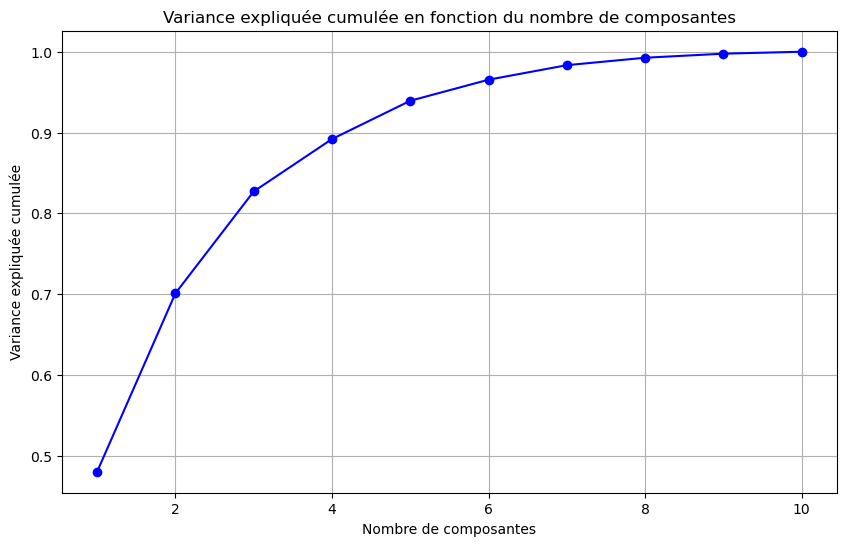

PC1: 0.480 (48.018% cumulé)
PC2: 0.221 (70.096% cumulé)
PC3: 0.126 (82.702% cumulé)
PC4: 0.065 (89.190% cumulé)
PC5: 0.047 (93.929% cumulé)
PC6: 0.026 (96.537% cumulé)
PC7: 0.018 (98.335% cumulé)
PC8: 0.009 (99.256% cumulé)
PC9: 0.005 (99.757% cumulé)
PC10: 0.002 (100.000% cumulé)


In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée cumulée en fonction du nombre de composantes')
plt.grid(True)
plt.show()

for i, var in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {var:.3f} ({cumulative_variance_ratio[i]:.3%} cumulé)")

<h4>Le nombre d’axes à retenir pour conserver une bonne quantité de l’information est 6</h4>

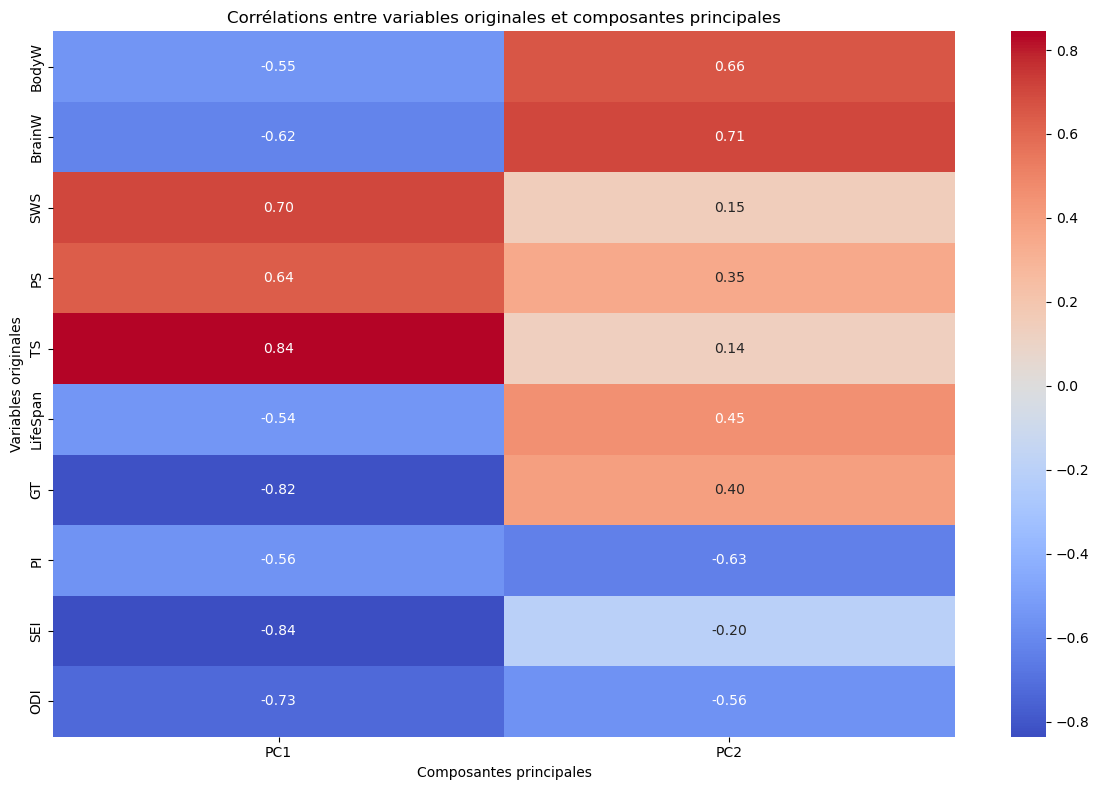

In [30]:
df_original = pd.DataFrame(X, columns=X.columns)
df_pca = pd.DataFrame(X_pca[:, :2], columns=[f'PC{i+1}' for i in range(2)])
correlation_matrix = np.zeros((len(X.columns), 2))  
for i in range(len(X.columns)):
    for j in range(2):
        correlation_matrix[i, j] = np.corrcoef(df_original.iloc[:, i], df_pca.iloc[:, j])[0, 1]

correlation_df = pd.DataFrame(correlation_matrix,
                            index=X.columns,
                            columns=[f'PC{i+1}' for i in range(2)])

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_df, 
            annot=True,  
            cmap='coolwarm',  
            center=0, 
            fmt='.2f') 

plt.title('Corrélations entre variables originales et composantes principales')
plt.xlabel('Composantes principales')
plt.ylabel('Variables originales')
plt.tight_layout()
plt.show()

<h3>Interprétation axes Mammals</h3>

<b>PC1</b> : Cet axe représente l'opposition entre les grands mammifères (corps et cerveau plus gros) avec une longue gestation, qui sont plus exposés pendant leur sommeil mais dorment peu et les petits mammifères qui dorment beaucoup (tant en sommeil paradoxal qu'en sommeil profond) et sont moins exposés pendant leur sommeil


<b>PC2</b> : Cet axe représente l'opposition entre les mammifères de grande taille avec un gros cerveau qui sont peu susceptibles d'être des proies et les mammifères plus vulnérables, avec une forte probabilité d'être des proies

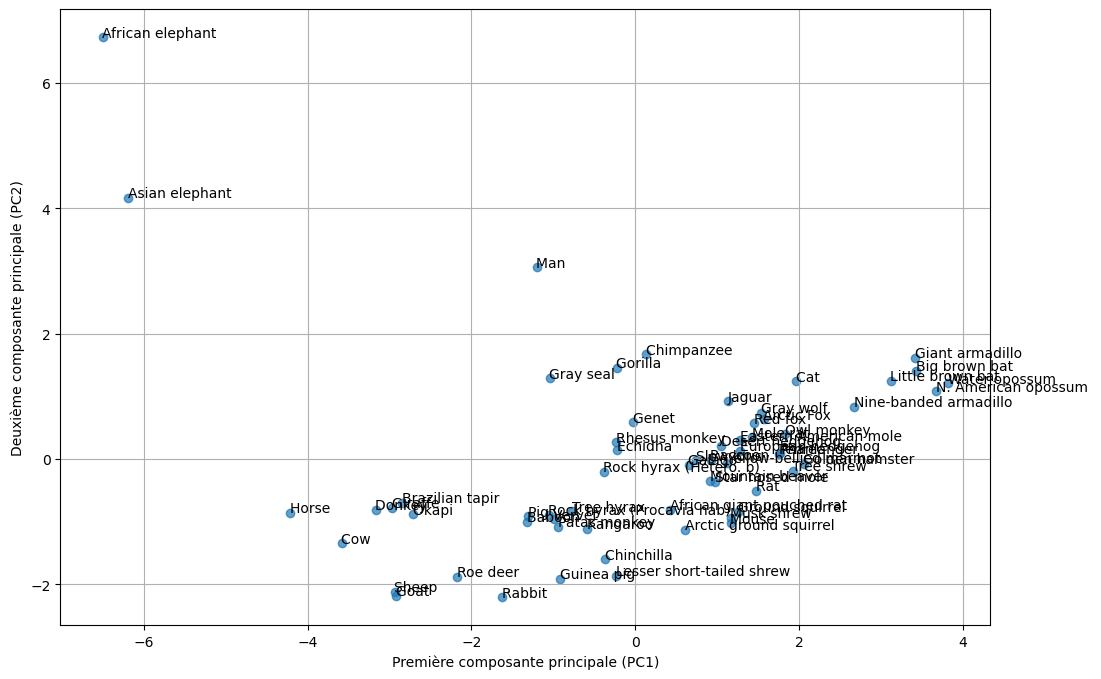

In [32]:
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
for label, x, y in zip(lables, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.xlabel('Première composante principale (PC1)')
plt.ylabel('Deuxième composante principale (PC2)')
plt.grid(True)
plt.show()

## Dataset Startups

In [34]:
data=pd.read_csv("50_Startups.csv", sep=';')
X=data.iloc[:,1:5]
labels=data.iloc[:,0]

<h3>PCA dataset Startups</h3>

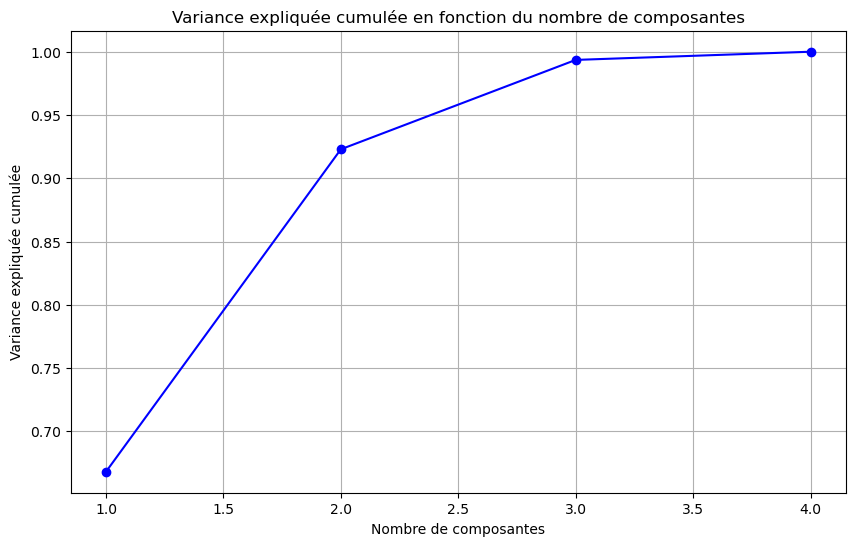

PC1: 0.668 (66.804% cumulé)
PC2: 0.255 (92.289% cumulé)
PC3: 0.071 (99.353% cumulé)
PC4: 0.006 (100.000% cumulé)


In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée cumulée en fonction du nombre de composantes')
plt.grid(True)
plt.show()

for i, var in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {var:.3f} ({cumulative_variance_ratio[i]:.3%} cumulé)")

<h4>Le nombre d’axes à retenir pour conserver une bonne quantité de l’information est 3</h4>

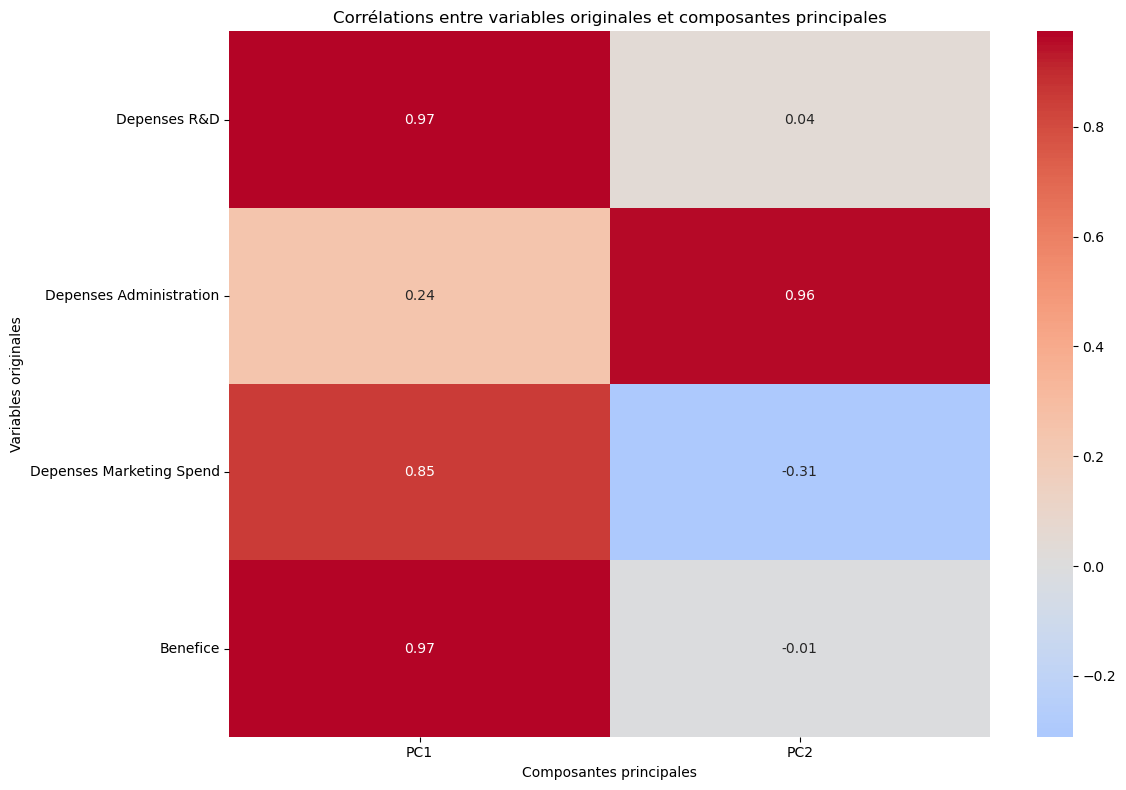

In [38]:
df_original = pd.DataFrame(X, columns=['Depenses R&D', 'Depenses Administration', 'Depenses Marketing Spend', 'Benefice'])
df_pca = pd.DataFrame(X_pca[:, :2], columns=[f'PC{i+1}' for i in range(2)])
correlation_matrix = np.zeros((4, 2))  
for i in range(4):
    for j in range(2):
        correlation_matrix[i, j] = np.corrcoef(df_original.iloc[:, i], df_pca.iloc[:, j])[0, 1]

correlation_df = pd.DataFrame(correlation_matrix,
                            index=['Depenses R&D', 'Depenses Administration', 'Depenses Marketing Spend', 'Benefice'],
                            columns=[f'PC{i+1}' for i in range(2)])

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_df, 
            annot=True,  
            cmap='coolwarm',  
            center=0, 
            fmt='.2f') 

plt.title('Corrélations entre variables originales et composantes principales')
plt.xlabel('Composantes principales')
plt.ylabel('Variables originales')
plt.tight_layout()
plt.show()

<h3>Interprétation axes PCA Startups</h3>
<b>PC1</b> : Cet axe représente la "taille/performance globale" de la startup. Il montre une forte association entre les dépenses en R&D, le marketing et les bénéfices. Les startups avec un score élevé sur PC1 sont celles qui investissent beaucoup en R&D et en marketing, et génèrent des bénéfices importants.

<b>PC2</b> : Cet axe oppose principalement les dépenses administratives aux dépenses marketing. Il représente la "structure des coûts" de la startup. Les startups avec un score positif sur PC2 ont tendance à privilégier les dépenses marketing par rapport aux dépenses administratives, tandis que celles avec un score négatif ont des coûts administratifs plus élevés.

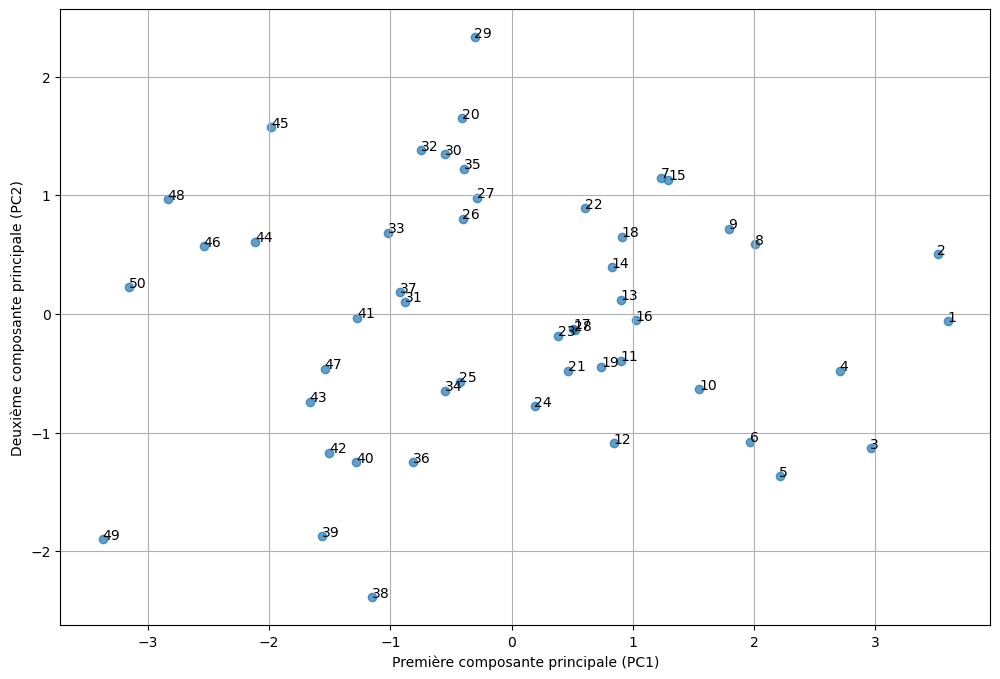

In [40]:
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.xlabel('Première composante principale (PC1)')
plt.ylabel('Deuxième composante principale (PC2)')
plt.grid(True)
plt.show()

# Clustering

 ## Kmeans

In [43]:
data = pd.read_csv('villes.csv', sep=';') 
X = data.iloc[:, 1:13]
labels = data.iloc[:, 0]

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [45]:
model=KMeans(n_clusters=3, random_state=None).fit(X)
labels_cluster=model.labels_

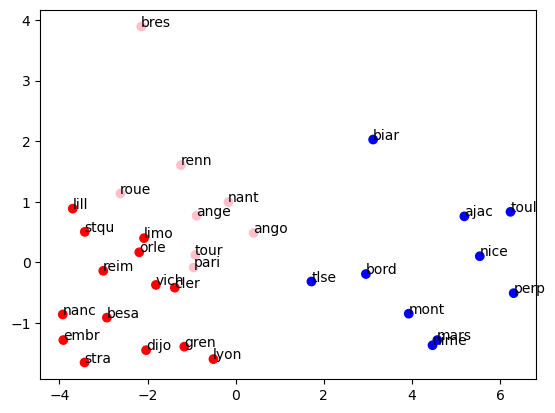

In [46]:
colors = ['red', 'yellow', 'blue', 'pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= labels_cluster, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

## AgglomerativeClustering Ward

In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [49]:
ward = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(X)
ward_labels=ward.labels_

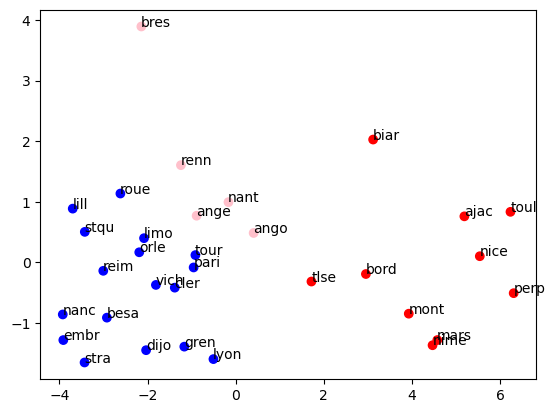

In [50]:
colors = ['red', 'yellow', 'blue', 'pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=ward_labels, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

## AgglomerativeClustering Single

In [52]:
single = AgglomerativeClustering(n_clusters=3, linkage="single").fit(X)
single_labels=single.labels_

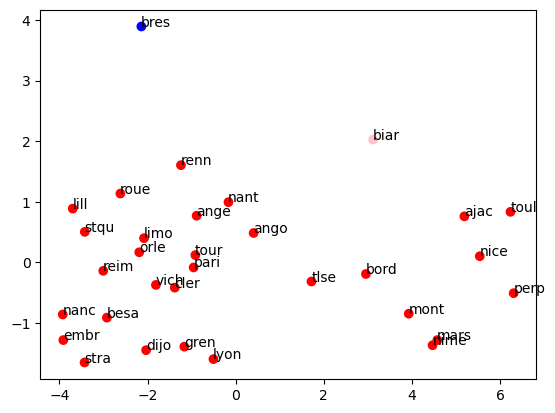

In [53]:
colors = ['red', 'yellow', 'blue', 'pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=single_labels, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

## AgglomerativeClustering Average

In [55]:
average = AgglomerativeClustering(n_clusters=3, linkage="average").fit(X)
average=average.labels_

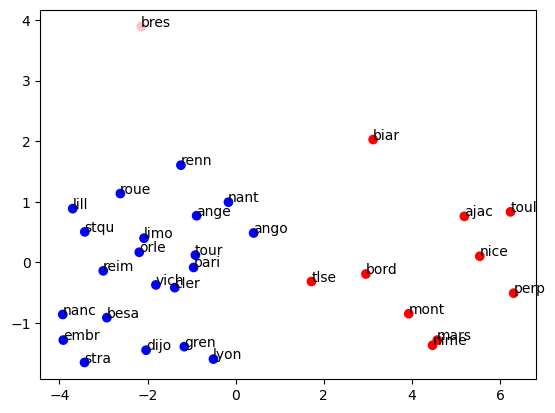

In [56]:
colors = ['red', 'yellow', 'blue', 'pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=average, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

## Meilleur partition 

In [58]:
for i in np.arange(2, 9):
    clustering = KMeans(n_clusters=i).fit_predict(X) 
    print(silhouette_score(X, clustering,metric='euclidean')) 

0.6181156437258204
0.4091200083228942
0.3620227346349381
0.3035866629575637
0.3549825969783211
0.3305210187103804
0.34808136926397354


<h3>La meilleur partition est de 2 clusters</h3>

## Meilleure méthode

In [61]:
model=KMeans(n_clusters=3, random_state=None).fit_predict(X)
print("KMeans: ",silhouette_score(X, model,metric='euclidean'))
ward = AgglomerativeClustering(n_clusters=3, linkage="ward").fit_predict(X)
print("Ward: ",silhouette_score(X, ward,metric='euclidean'))
single = AgglomerativeClustering(n_clusters=3, linkage="single").fit_predict(X)
print("single: ",silhouette_score(X, single,metric='euclidean'))
average = AgglomerativeClustering(n_clusters=3, linkage="average").fit_predict(X)
print("average: ",silhouette_score(X, average,metric='euclidean'))


KMeans:  0.3986949085602143
Ward:  0.4063133203891265
single:  -0.022192344588322643
average:  0.49172813667041615


<h3>La meilleure méthode est AgglomerativeClustering avec average comme linkage </h3>

##  Fonction qui  compare toutes ces approches pour un jeu de donnée

In [64]:
def meilleur_clustering(X):
    methods = {
        "KMeans": KMeans(n_clusters=3, random_state=42),
        "Ward": AgglomerativeClustering(n_clusters=3, linkage="ward"),
        "Single": AgglomerativeClustering(n_clusters=3, linkage="single"),
        "Average": AgglomerativeClustering(n_clusters=3, linkage="average"),
    }
    scores = {}
    for nom, model in methods.items():
        labels = model.fit_predict(X)
        score = silhouette_score(X, labels, metric='euclidean')
        scores[nom] = score
    m = max(scores, key=scores.get)
    meilleur_clustering = scores[m]
    return {"Meilleure méthode": meilleur_clustering, "Score": m} 

## Fichier Segmentation_data

In [66]:
data = pd.read_csv("segmentation_data.csv", sep=',')
X = data.iloc[:, 1:]

## Meilleur methode pour ce jeu de donnée

In [68]:
meilleur_clustering(X)

{'Meilleure méthode': 0.7275718052271952, 'Score': 'Single'}